# Skin Color Prediction

In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os,os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datastack.models.SkinColorPredict as skin_model

import warnings
warnings.filterwarnings('ignore')


skin_model = reload(skin_model)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
m=3
ethnicity = ["dynamic.hg38_face_pc.pc."+str(x) for x in xrange(1,m+1,1)]
modelSkinColor = skin_model.SkinColor(ethnicity=ethnicity)

########################################
Replace missing values for each SNP with respective mode values:
   rs16891982  rs12203592  rs1545397  rs12913832  rs1426654  rs885479  \
0           2           0          0           2          2         0   

   rs6119471  
0          0  
Median age is: 35.2470674632
########################################


In [13]:
baseColor = modelSkinColor.trainSkinColor()

running the model ...


Model,Covariates,skin_color_l: R2,skin_color_l: MAE,skin_color_l: MSE,skin_color_a: R2,skin_color_a: MAE,skin_color_a: MSE,skin_color_b: R2,skin_color_b: MAE,skin_color_b: MSE,Samples
Mean,,0.000,21.765,610.527,0.000,4.830,35.920,0.000,5.994,54.226,1026.000
Median,,-0.005,21.722,613.687,-0.003,4.824,36.034,-0.013,5.958,54.939,1026.000
Ridge,Age,0.055,20.892,577.215,-0.006,4.844,36.147,0.000,6.002,54.204,1026.000
Ridge,Gender,-0.003,21.934,612.326,-0.003,4.824,36.015,0.075,5.780,50.179,1026.000
Ridge,Ethnicity,0.744,10.221,156.143,0.057,4.732,33.873,0.171,5.454,44.949,1026.000
Lasso,Ethnicity,0.744,10.223,156.162,0.057,4.735,33.882,0.171,5.454,44.949,1026.000
XGBRegressor,Ethnicity,0.745,10.220,155.652,0.083,4.662,32.928,0.251,5.156,40.597,1026.000
Ridge,AGE,0.788,9.156,129.463,0.063,4.695,33.673,0.276,5.088,39.250,1026.000
Lasso,AGE,0.788,9.156,129.492,0.062,4.698,33.683,0.276,5.087,39.247,1026.000
XGBRegressor,AGE,0.786,9.274,130.767,0.226,4.304,27.810,0.406,4.548,32.221,1026.000


In [14]:
modelSkinColor.pickleModels(baseColor)

Models are stored at: skin-color-L-model.pkl, skin-color-A-model.pkl, skin-color-B-model.pkl
The order of features is: ['dynamic.FACE_P.age.v2.value', 'dynamic.FACE_P.gender.v1.value', 'dynamic.hg38_face_pc.pc.1', 'dynamic.hg38_face_pc.pc.2', 'dynamic.hg38_face_pc.pc.3', 'rs12203592', 'rs12913832', 'rs1426654', 'rs1545397', 'rs16891982', 'rs6119471', 'rs885479'], Features are not normalized, except mode is used for missing SNPs, standard scaling is used for predicted age and [+1,0,-1] is used for [female, missing, male].


In [25]:
# new sample simulation
name = u"12881_187519535"
subject_num = list(modelSkinColor.data.loc[:,"ds.index.sample_key"]).index(name)
handleSkin = skin_model.SkinColor(data_load=False)
features = handleSkin.load_data_for_sample_old(sample_key=name)

In [24]:
# predict RGB skin color values, do not pre-process since this is already has been done
# but for a new sample set this flag to True
#skin_model = reload(skin_model)
rgb = handleSkin.predictNewSample(features,preprocess=True)

PREDICTED: 
LAB = (43.42, 19.18, 22.54)

RGB = (0.548, 0.352, 0.259)



ACTUAL: 
LAB = (44.61, 28.42, 29.91)

RGB = (0.615, 0.334, 0.224)



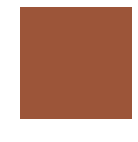

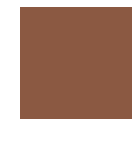

In [26]:
# compare with actual since we have it, actual - top, predicted - bottom
rgb_true = modelSkinColor.compareWithActual(subject_num)
modelSkinColor.visualizeSideBySide(rgb,rgb_true,name)

# visualize our prediction if we did not have the actual skin color
#modelSkinColor.visualizePredicted(rgb,name)

# Face Prediction

In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os,os.path
sys.path.append('/Users/aharley/cerebro/gwas/python/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import datastack.models.DepthColorPCsPredict as face_model
face_model = reload(face_model)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# specify PCs version
version = 'v2'

# provide column name for depth and color PCs to be predicted
models = face_model.DepthColorPCs(version = version, your_pcs_depth="dynamic.FACE.face.{}_visit1.DepthPC".format(version), your_pcs_color="dynamic.FACE.face.{}_visit1.ColorPC".format(version))


########################################
Replace missing values for each SNP with respective mode values:
   rs16891982  rs12203592  rs1545397  rs12913832  rs1426654  rs885479  \
0           2           0          0           2          2         0   

   rs6119471  
0          0  
Median age is: 32.5
Median bmi is: 26.665
########################################


In [28]:
# run predictions for Depth PCs
baseDepthPC = models.trainDepthPCs(n = 50, with_holdout=True, run_full_only=True, run_keys=["AGE + BMI"])

Model,Covariates,SELECT10,R2,pc1: R2,pc2: R2,pc3: R2,pc4: R2,pc5: R2,pc6: R2,pc7: R2,pc8: R2,pc9: R2,pc10: R2,pc11: R2,pc12: R2,pc13: R2,pc14: R2,pc15: R2,pc16: R2,pc17: R2,pc18: R2,pc19: R2,pc20: R2,pc21: R2,pc22: R2,pc23: R2,pc24: R2,pc25: R2,pc26: R2,pc27: R2,pc28: R2,pc29: R2,pc30: R2,pc31: R2,pc32: R2,pc33: R2,pc34: R2,pc35: R2,pc36: R2,pc37: R2,pc38: R2,pc39: R2,pc40: R2,pc41: R2,pc42: R2,pc43: R2,pc44: R2,pc45: R2,pc46: R2,pc47: R2,pc48: R2,pc49: R2,pc50: R2,Samples
Mean,,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,908.000
Median,,0.000,0.000,-0.002,-0.006,-0.001,-0.002,-0.000,-0.000,-0.000,-0.002,-0.003,-0.000,-0.000,-0.002,-0.001,-0.006,-0.006,-0.001,-0.000,-0.001,-0.002,-0.007,-0.000,-0.000,-0.000,-0.003,-0.001,-0.002,-0.000,-0.000,-0.001,-0.000,-0.000,-0.000,-0.001,-0.000,-0.000,-0.003,-0.000,-0.000,-0.000,-0.000,-0.001,-0.001,-0.000,-0.000,-0.006,-0.000,-0.000,-0.000,-0.000,-0.000,908.000
Ridge,Age,0.150,0.010,0.008,0.169,-0.004,-0.001,0.037,-0.003,-0.004,0.002,0.048,0.011,-0.009,0.090,0.011,0.057,0.015,-0.004,0.054,0.019,0.020,0.010,-0.001,0.011,-0.006,0.004,-0.005,-0.006,0.010,-0.005,-0.003,0.003,0.012,0.000,-0.005,-0.005,0.006,-0.006,0.005,-0.002,0.002,-0.009,0.001,-0.007,-0.005,-0.004,0.021,-0.001,-0.004,-0.003,-0.002,-0.004,908.000
Ridge,Gender,0.199,0.015,0.307,0.281,0.126,0.015,0.064,-0.001,-0.002,0.034,0.002,0.007,-0.006,0.000,0.019,-0.003,0.023,0.007,-0.003,-0.006,-0.003,-0.004,-0.001,-0.005,-0.003,-0.005,-0.005,-0.005,-0.002,-0.005,-0.002,-0.005,-0.005,-0.003,-0.001,-0.002,-0.001,-0.005,0.002,-0.005,-0.008,-0.009,-0.005,-0.007,-0.003,-0.004,-0.004,-0.005,-0.003,-0.002,-0.006,-0.004,908.000
Ridge,Ethnicity,0.267,0.036,0.122,0.586,0.080,0.283,0.191,0.074,0.086,0.065,-0.007,0.020,0.073,0.030,0.008,0.029,0.051,0.010,0.060,-0.008,0.032,0.025,0.019,-0.021,0.004,0.014,0.020,-0.003,-0.014,0.023,0.011,-0.029,0.015,-0.028,-0.031,0.001,-0.004,0.005,0.003,-0.001,0.020,-0.012,0.010,0.002,-0.006,0.010,-0.008,0.014,0.007,-0.020,0.012,-0.009,908.000
Ridge,AGE,0.423,0.066,0.466,0.760,0.199,0.324,0.390,0.084,0.095,0.098,0.049,0.077,0.067,0.108,0.060,0.085,0.107,0.024,0.123,0.027,0.050,0.040,0.019,-0.009,0.001,0.015,0.013,-0.009,0.009,0.020,0.014,-0.023,0.033,-0.020,-0.034,0.003,0.005,0.006,0.017,-0.001,0.018,-0.021,0.011,-0.004,-0.012,0.009,0.008,0.014,0.002,-0.020,0.010,-0.015,908.000
Ridge,AGE + BMI,0.489,0.073,0.619,0.765,0.223,0.422,0.392,0.094,0.126,0.106,0.048,0.077,0.072,0.116,0.062,0.082,0.106,0.018,0.125,0.025,0.048,0.046,0.018,-0.012,-0.001,0.026,0.029,-0.011,0.008,0.020,0.021,-0.024,0.045,-0.005,-0.035,0.001,0.017,0.004,0.014,-0.004,0.015,-0.023,0.009,-0.004,-0.011,0.007,0.004,0.014,0.000,-0.027,0.009,-0.016,908.000
Ridge,BMI,0.173,0.007,0.153,0.145,0.025,0.032,-0.000,0.003,0.037,0.004,-0.001,0.002,0.001,0.020,-0.004,0.002,-0.004,-0.008,-0.002,-0.003,0.003,0.003,-0.002,-0.002,-0.005,0.003,0.019,-0.003,-0.003,-0.004,-0.001,-0.003,0.011,0.006,-0.004,-0.006,0.001,-0.005,-0.004,-0.005,-0.005,-0.007,-0.006,-0.005,-0.001,-0.005,-0.004,-0.003,-0.002,-0.004,-0.005,-0.002,908.000


In [29]:
# run predictions for Color PCs
baseColorPC = models.trainColorPCs(n = 50, with_holdout=True, run_full_only=True, run_keys=["AGE","AGE + BMI", "AGE + SNPs", "AGE + BMI_SNPs"])

Model,Covariates,SELECT10,R2,pc1: R2,pc2: R2,pc3: R2,pc4: R2,pc5: R2,pc6: R2,pc7: R2,pc8: R2,pc9: R2,pc10: R2,pc11: R2,pc12: R2,pc13: R2,pc14: R2,pc15: R2,pc16: R2,pc17: R2,pc18: R2,pc19: R2,pc20: R2,pc21: R2,pc22: R2,pc23: R2,pc24: R2,pc25: R2,pc26: R2,pc27: R2,pc28: R2,pc29: R2,pc30: R2,pc31: R2,pc32: R2,pc33: R2,pc34: R2,pc35: R2,pc36: R2,pc37: R2,pc38: R2,pc39: R2,pc40: R2,pc41: R2,pc42: R2,pc43: R2,pc44: R2,pc45: R2,pc46: R2,pc47: R2,pc48: R2,pc49: R2,pc50: R2,Samples
Mean,,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,908.000
Median,,0.000,0.000,-0.005,-0.002,-0.012,-0.003,-0.001,-0.001,-0.000,-0.001,-0.001,-0.003,-0.000,-0.001,-0.000,-0.001,-0.002,-0.001,-0.000,-0.001,-0.000,-0.000,-0.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.005,-0.002,-0.001,-0.002,-0.002,-0.001,-0.000,-0.000,-0.001,-0.000,-0.000,-0.002,-0.001,-0.001,-0.000,-0.000,-0.000,-0.000,-0.001,-0.000,-0.000,-0.002,908.000
Ridge,Age,0.163,0.009,0.126,0.030,0.092,0.046,0.004,0.018,0.003,-0.002,-0.003,0.051,0.026,-0.001,-0.000,0.005,0.001,-0.003,0.016,0.014,-0.005,-0.004,-0.005,-0.004,-0.003,0.006,0.013,-0.005,0.007,-0.000,0.008,-0.004,-0.009,0.007,-0.002,-0.007,-0.003,0.021,0.016,-0.003,0.005,-0.002,-0.002,0.003,-0.003,-0.003,-0.001,0.002,-0.001,0.002,-0.008,-0.004,908.000
Ridge,Gender,0.181,0.013,-0.005,0.021,0.648,0.010,-0.001,0.095,-0.004,0.002,-0.002,0.004,0.005,0.000,-0.003,-0.002,0.001,-0.005,0.006,0.001,-0.005,-0.005,-0.001,0.004,-0.004,-0.001,-0.003,-0.007,-0.003,-0.004,-0.004,-0.004,-0.003,-0.003,0.000,0.007,-0.003,-0.006,-0.004,-0.004,-0.006,-0.002,-0.007,-0.004,-0.003,0.001,-0.006,-0.004,-0.002,-0.006,-0.007,-0.003,908.000
Ridge,Ethnicity,0.252,0.030,0.756,0.039,0.050,0.298,0.104,0.052,0.085,0.090,0.011,0.010,0.038,0.015,0.020,0.061,0.040,0.026,0.012,-0.019,0.043,0.008,-0.002,-0.020,0.001,0.017,-0.002,-0.005,0.000,-0.009,0.032,-0.018,-0.017,-0.012,0.002,0.003,-0.026,-0.003,-0.008,-0.006,-0.021,-0.017,-0.022,-0.024,-0.010,-0.010,-0.023,0.005,-0.012,-0.012,-0.014,-0.003,908.000
Ridge,AGE,0.388,0.055,0.791,0.104,0.705,0.339,0.100,0.175,0.081,0.097,0.011,0.117,0.103,0.014,0.020,0.072,0.045,0.036,0.039,-0.007,0.038,0.004,-0.002,-0.011,0.008,0.023,0.032,-0.010,0.007,-0.010,0.038,-0.017,-0.023,0.001,0.005,0.008,-0.028,0.024,0.007,-0.010,-0.017,-0.016,-0.031,-0.018,-0.011,-0.011,-0.018,0.008,-0.011,-0.011,-0.011,-0.008,908.000
Ridge,AGE + BMI,0.408,0.059,0.791,0.133,0.709,0.344,0.113,0.175,0.096,0.096,0.045,0.118,0.100,0.011,0.038,0.094,0.043,0.035,0.041,-0.009,0.052,0.006,-0.003,0.014,0.016,0.032,0.031,-0.004,0.014,-0.010,0.039,-0.023,-0.024,0.003,0.002,0.009,-0.014,0.023,0.003,-0.010,-0.018,-0.021,-0.033,-0.021,-0.014,-0.008,-0.019,0.013,-0.014,-0.012,-0.012,-0.010,908.000
Ridge,AGE + BMI_SNPs,0.413,0.056,0.804,0.117,0.708,0.349,0.129,0.179,0.117,0.088,0.043,0.117,0.098,0.011,0.029,0.088,0.054,0.030,0.031,-0.018,0.051,0.009,-0.013,0.023,0.014,0.017,0.023,-0.012,0.011,-0.014,0.027,-0.020,-0.030,-0.003,0.010,0.005,-0.020,0.012,-0.006,-0.017,-0.022,-0.034,-0.042,-0.030,-0.013,-0.018,-0.018,-0.003,-0.018,-0.022,-0.019,-0.025,908.000
Ridge,AGE + SNPs,0.396,0.052,0.804,0.088,0.704,0.344,0.112,0.179,0.103,0.089,0.011,0.115,0.101,0.014,0.012,0.067,0.057,0.031,0.030,-0.017,0.036,0.007,-0.012,-0.003,0.006,0.008,0.024,-0.017,0.005,-0.015,0.026,-0.014,-0.029,-0.005,0.013,0.004,-0.032,0.014,-0.002,-0.017,-0.021,-0.029,-0.041,-0.028,-0.010,-0.021,-0.016,-0.007,-0.015,-0.021,-0.018,-0.023,908.000
Ridge,BMI,0.151,0.004,0.056,0.025,0.056,0.012,0.046,-0.003,0.008,-0.001,0.027,-0.002,-0.004,-0.005,0.020,0.022,-0.003,-0.008,-0.003,0.000,0.010,0.004,-0.004,0.018,0.003,0.019,-0.002,0.000,-0.001,-0.005,0.002,-0.010,-0.004,-0.003,-0.004,-0.004,0.009,-0.005,-0.002,-0.001,-0.002,-0.006,-0.001,-0.004,-0.004,-

In [30]:
# Pickle our final model for Depth and Color PCs
models.pickleModels(baseDepthPC,baseColorPC)

Models are stored at: depth-PCs-model.pkl, color-PCs-model.pkl
The order of features is: ['dynamic.hg38_face_pc.pc.1', 'dynamic.hg38_face_pc.pc.10', 'dynamic.hg38_face_pc.pc.100', 'dynamic.hg38_face_pc.pc.1000', 'dynamic.hg38_face_pc.pc.101', 'dynamic.hg38_face_pc.pc.102', 'dynamic.hg38_face_pc.pc.103', 'dynamic.hg38_face_pc.pc.104', 'dynamic.hg38_face_pc.pc.105', 'dynamic.hg38_face_pc.pc.106', 'dynamic.hg38_face_pc.pc.107', 'dynamic.hg38_face_pc.pc.108', 'dynamic.hg38_face_pc.pc.109', 'dynamic.hg38_face_pc.pc.11', 'dynamic.hg38_face_pc.pc.110', 'dynamic.hg38_face_pc.pc.111', 'dynamic.hg38_face_pc.pc.112', 'dynamic.hg38_face_pc.pc.113', 'dynamic.hg38_face_pc.pc.114', 'dynamic.hg38_face_pc.pc.115', 'dynamic.hg38_face_pc.pc.116', 'dynamic.hg38_face_pc.pc.117', 'dynamic.hg38_face_pc.pc.118', 'dynamic.hg38_face_pc.pc.119', 'dynamic.hg38_face_pc.pc.12', 'dynamic.hg38_face_pc.pc.120', 'dynamic.hg38_face_pc.pc.121', 'dynamic.hg38_face_pc.pc.122', 'dynamic.hg38_face_pc.pc.123', 'dynamic.hg38_f

In [35]:
# new sample simulation
name = u"12881_187519535"
subject_num = list(models.data.loc[:,"ds.index.sample_key"]).index(name) 

handleFace = face_model.DepthColorPCs(data_load=False)
[featuresDepth, featuresColor] = handleFace.load_data_for_sample_old(sample_key=name)

In [37]:
# predict PCs for the next sample
face_model = reload(face_model)
[predDepthPCs,predColorPCs]=models.predictNewSample(featuresDepth, featuresColor, preprocess=True)

In [33]:
# get actual PCs and truncated PCs
m=50
n=1000
depthPCs = ["dynamic.FACE.face.v2_visit1.DepthPC."+str(x) for x in xrange(1,m+1,1)]
colorPCs = ["dynamic.FACE.face.v2_visit1.ColorPC."+str(x) for x in xrange(1,m+1,1)]
actual_depthPCs = ["dynamic.FACE.face.v2_visit1.DepthPC."+str(x) for x in xrange(1,n+1,1)]
actual_colorPCs = ["dynamic.FACE.face.v2_visit1.ColorPC."+str(x) for x in xrange(1,n+1,1)]
truncDepthPCs = list(models.data.ix[subject_num,depthPCs])
truncColorPCs = list(models.data.ix[subject_num,colorPCs])
actualDepthPCs = list(models.data.ix[subject_num,actual_depthPCs])
actualColorPCs = list(models.data.ix[subject_num,actual_colorPCs])

In [34]:
#visualization
from datastack.tools import facerenderer
reload(facerenderer)
#facerenderer.FaceRenderer.install_ipython()
frr = facerenderer.FaceRenderer(host="jarvis.hli.io") #172.31.42.192")
frr.initialize('v2')

In [35]:
frr.render(x=list(predDepthPCs), z=list(predColorPCs), quality=5)
frr.render(x=list(truncDepthPCs), z=list(truncColorPCs), quality=5)
frr.render(x=list(actualDepthPCs), z=list(actualColorPCs), quality=5)